In [6]:
! pip install --upgrade pip
! pip install kmodes

Requirement already up-to-date: pip in /home/aptus8/anaconda3/lib/python3.6/site-packages (10.0.1)
tensorflow-tensorboard 1.5.1 has requirement bleach==1.5.0, but you'll have bleach 2.1.2 which is incompatible.
tensorflow-tensorboard 1.5.1 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

import numpy as np
from kmodes.kprototypes import KPrototypes

In [45]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)

In [46]:
cluster_2016.head()

,Unnamed: 0,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [47]:
    # dropping  the index column
    cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])

In [48]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,Studentenwohnheim Ginnheimer Landstr. 42,226257.0,Fritzlarerstraße / Kirchplatz,214447.0,Frankfurt am Main,Android,13.083333,6
1999996,143763,Axel-Springer-Platz/Wexstraße,163327.0,Axel-Springer-Platz/Wexstraße,163327.0,Hamburg,others,1.733333,6
1999997,106407,Darmstadt Hbf,42198.0,h_da / Campus - Mensa,41940.0,Berlin,others,246.366667,6
1999998,113595,Darmstadt Hbf,128496.0,h_da / Campus - Mensa,243552.0,Darmstadt,Android,11.016667,6
1999999,143840,Dehnhaide/Barmbeker Markt,17335.0,Weidestraße /Johannes-Prassek-Park,54063.0,Berlin,iPhone,22.816667,6


In [49]:
cluster_2016['VEHICLE_HAL_ID'].unique()

array([108647, 108371, 119829, ..., 110310, 107219, 108927])

In [50]:
len(cluster_2016['VEHICLE_HAL_ID'].unique())

10001

In [51]:
cluster_2016['TECHNICAL_INCOME_CHANNEL'].unique()

array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [52]:
cluster_2016['Month'].unique()

array([1, 2, 3, 4, 5, 6])

In [53]:
#! pip install kmodes
#! pip install --upgrade pip

# Implementation

In [54]:
# converting all categorcal variable to dummy encoding

cluster_2016['CITY_RENTAL_ZONE']=cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['TECHNICAL_INCOME_CHANNEL']=cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])

In [55]:
cluster_2016.tail(5)

,VEHICLE_HAL_ID,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
1999995,163843,226257.0,214447.0,12,0,13.083333,6
1999996,143763,163327.0,163327.0,18,5,1.733333,6
1999997,106407,42198.0,41940.0,3,5,246.366667,6
1999998,113595,128496.0,243552.0,8,0,11.016667,6
1999999,143840,17335.0,54063.0,3,4,22.816667,6


In [19]:
# To convert the value into numpy array

cluster_2016 = cluster_2016.iloc[:, 0:].values

In [20]:
# printing the first array of features

cluster_2016[0]

array([1.08647e+05, 2.13687e+05, 2.13855e+05, 1.80000e+01, 0.00000e+00,
       2.88000e+01, 1.00000e+00])

In [21]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kproto = KPrototypes(n_clusters=7, init='Cao', verbose=2)

# fit the data in numpy array format , and given all the  categorical features index
clusters = kproto.fit(cluster_2016, categorical=[0, 1, 2, 3, 4, 6])

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.n_iter_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 22728, ncost: 1275075530563.5054
Run: 1, iteration: 2/100, moves: 15241, ncost: 1165235375626.2922
Run: 1, iteration: 3/100, moves: 10761, ncost: 981881017555.1785
Run: 1, iteration: 4/100, moves: 7804, ncost: 734069289466.942
Run: 1, iteration: 5/100, moves: 6306, ncost: 211824215986.285
Run: 1, iteration: 6/100, moves: 7156, ncost: 66359261946.594154
Run: 1, iteration: 7/100, moves: 9972, ncost: 53003708501.99083
Run: 1, iteration: 8/100, moves: 10758, ncost: 47086478597.89938
Run: 1, iteration: 9/100, moves: 12134, ncost: 41308280043.00325
Run: 1, iteration: 10/100, moves: 

In [22]:
# save the model to disk
import pickle

In [23]:
# creating a file that can save the model
filename = 'kproto1.sav'

In [24]:
# save the model in the file
pickle.dump(kproto, open(filename, 'wb'))

In [25]:
# load the model from disk for faster implementation
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.cost_)

25117647324.80329


In [26]:
# for predict a new data points with index of categorical value

loaded_model.predict(np.array([[1.43840000e+05, 1.73350000e+04, 5.40630000e+04, 3.00000000e+00,
       4.00000000e+00, 2.28166667e+01, 6.00000000e+00]]),categorical=[0, 1, 2, 3, 4,6])

array([1], dtype=uint8)

In [27]:
print(kproto.cost_)

25117647324.80329


In [28]:
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

[array([[1.40225777e+04],
       [1.87674090e+01],
       [1.20068985e+03],
       [4.12483184e+04],
       [9.31515104e+04],
       [4.04251568e+03],
       [6.28360000e+05]]), array([[1.13542e+05, 3.04300e+04, 3.04300e+04, 1.80000e+01, 4.00000e+00,
        5.00000e+00],
       [1.08235e+05, 1.98077e+05, 1.98077e+05, 1.80000e+01, 4.00000e+00,
        5.00000e+00],
       [1.20825e+05, 2.14419e+05, 2.14419e+05, 1.80000e+01, 4.00000e+00,
        5.00000e+00],
       [1.06779e+05, 1.14278e+05, 2.54126e+05, 3.00000e+00, 0.00000e+00,
        5.00000e+00],
       [1.10994e+05, 6.76000e+03, 6.15600e+03, 1.20000e+01, 2.00000e+00,
        1.00000e+00],
       [1.19238e+05, 1.42638e+05, 1.42638e+05, 1.80000e+01, 4.00000e+00,
        5.00000e+00],
       [1.43417e+05, 1.31653e+05, 2.18174e+05, 1.20000e+01, 0.00000e+00,
        2.00000e+00]])]
25117647324.80329
37


In [29]:
# To predict on new data points

kproto.predict(np.array([[1.43840000e+05, 1.73350000e+04, 5.40630000e+04, 3.00000000e+00,
       4.00000000e+00, 2.28166667e+01, 6.00000000e+00]]),categorical=[0, 1, 2, 3, 4,6])

array([1], dtype=uint8)

In [30]:
# Predicted cluster level on existing dataset
final = kproto.labels_
np.unique(final)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [31]:
# total data
kproto.labels_.shape

(2000000,)

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_2016)

In [33]:
%matplotlib inline

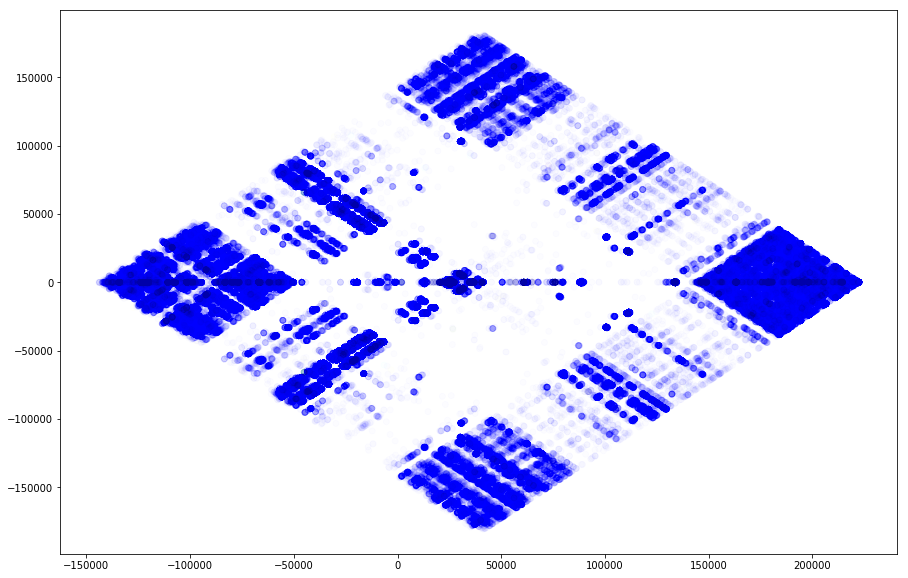

In [34]:
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in kproto.labels_] ,label = kproto.labels_, alpha=0.01)
plt.show()

In [35]:
plt.savefig('kproto2.png')

In [36]:
labels = [colors[l_] for l_ in kproto.labels_]

In [37]:
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    186
dtype: int64
blue 0    1991924
dtype: int64
yellow 0    6319
dtype: int64
green 0    38
dtype: int64
purple 0    8
dtype: int64
cyan 0    1522
dtype: int64
brown 0    3
dtype: int64


## Analysis on clusters

In [87]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
# converting all categorcal variable to dummy encoding

#cluster_2016['CITY_RENTAL_ZONE']=cluster_2016['CITY_RENTAL_ZONE'].astype('category').cat.codes
#cluster_2016['TECHNICAL_INCOME_CHANNEL']=cluster_2016['TECHNICAL_INCOME_CHANNEL'].astype('category').cat.codes
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,1
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,1
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,1
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,1


In [88]:
cluster_2016["labels"] = kproto.labels_

In [89]:
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,1,1
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,1,1
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,1,1
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,1,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,1,1


### For cluster - 0

In [251]:
cluster0 = cluster_2016[cluster_2016["labels"] == 0]
cluster0.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
2914,119692,Lerchenfeld / Uferstraße,Lerchenfeld / Uferstraße,Hamburg,iPhone,17351.850000,1,0
8576,119269,Uferstraße/Wagnerstraße,Holsteinischer Kamp/ Wagnerstraße,Berlin,iPhone,10750.066667,1,0
13172,120825,FSC Berlin Werkstatt LIDL-Bike,FSC Berlin Werkstatt LIDL-Bike,Berlin,others,11020.733333,1,0
18675,110452,Winterhuder Weg/ Zimmerstraße,Hallerstraße / Rohtenbaumchaussee,Hamburg,iPhone,10335.850000,1,0
51472,109269,Holsteinischer Kamp/ Wagnerstraße,Lortzingstraße/Friedrichsberger Straße,Berlin,iPhone,10974.366667,1,0


In [252]:
cluster0.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,186.000000,186.000000,186.000000,186.0
mean,124858.483871,14022.577688,3.892473,0.0
std,19871.354170,4478.210720,1.323079,0.0
min,107103.000000,9044.366667,1.000000,0.0
25%,110002.000000,10399.600000,3.000000,0.0
50%,119156.500000,12544.241667,4.000000,0.0
75%,120815.500000,16597.516667,5.000000,0.0
max,167443.000000,27206.333333,6.000000,0.0


In [253]:
CITY = cluster0.CITY_RENTAL_ZONE.unique()
CITY

array(['Hamburg', 'Berlin', 'Darmstadt', 'Frankfurt am Main', 'Halle',
       'Bonn', 'Rüsselsheim', 'Lübeck', 'Göttingen', 'Marburg', 'Kassel',
       'München', 'Erlangen', 'Bremen', 'Braunschweig', 'Düsseldorf',
       'Köln'], dtype=object)

In [254]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster0[cluster0['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)    

{'Hamburg': 64, 'Berlin': 52, 'Darmstadt': 5, 'Frankfurt am Main': 33, 'Halle': 4, 'Bonn': 2, 'Rüsselsheim': 8, 'Lübeck': 2, 'Göttingen': 3, 'Marburg': 1, 'Kassel': 2, 'München': 5, 'Erlangen': 1, 'Bremen': 1, 'Braunschweig': 1, 'Düsseldorf': 1, 'Köln': 1}


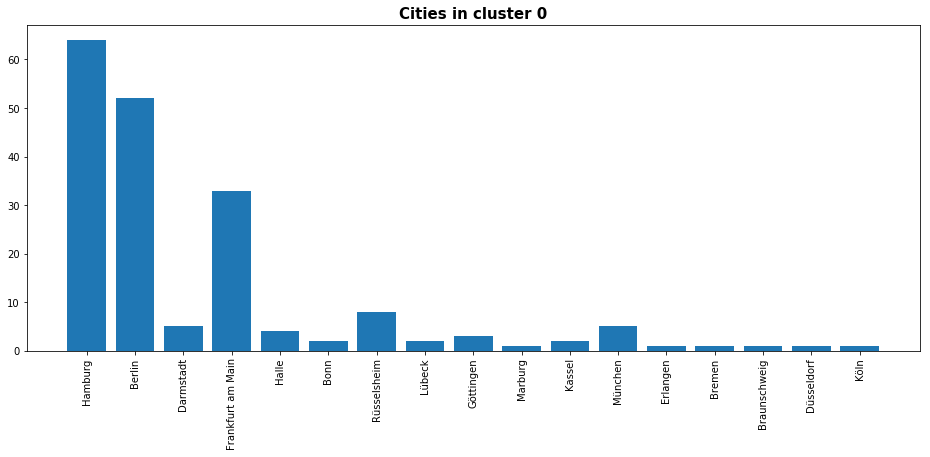

In [255]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()

In [256]:
MONTH = cluster0.Month.unique()
MONTH

array([1, 2, 3, 4, 5, 6])

In [257]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster0[cluster0['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)    

{1: 12, 2: 22, 3: 28, 4: 43, 5: 74, 6: 7}


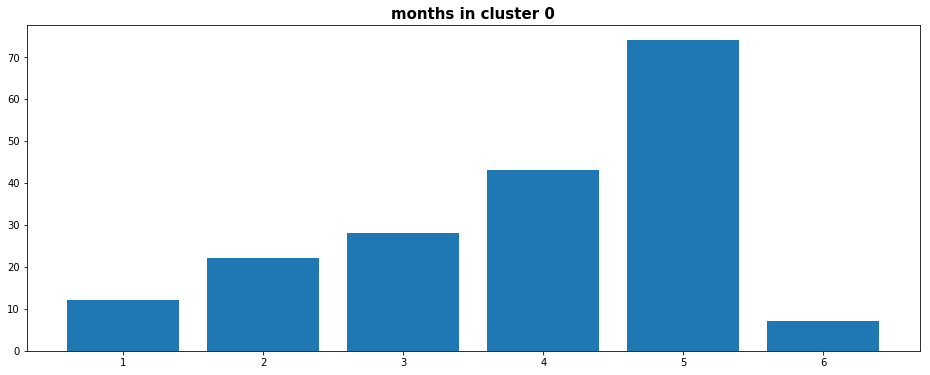

In [258]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()

In [259]:
CHANNEL = cluster0.TECHNICAL_INCOME_CHANNEL.unique()
CHANNEL

array(['iPhone', 'others', 'Android', 'IVR'], dtype=object)

In [260]:
channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster0[cluster0['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

{'iPhone': 67, 'others': 46, 'Android': 57, 'IVR': 16}


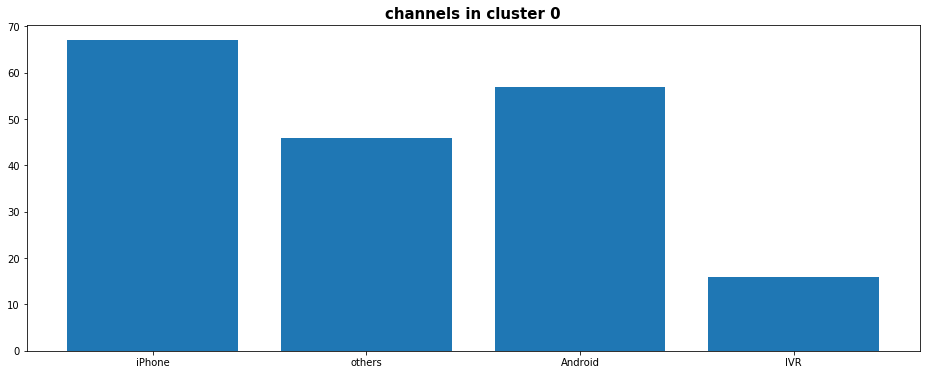

In [261]:
x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channels in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()

In [262]:
SZONE = cluster0.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster0[cluster0['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))

{'Lerchenfeld / Uferstraße': 2, 'Uferstraße/Wagnerstraße': 2, 'FSC Berlin Werkstatt LIDL-Bike': 4, 'Winterhuder Weg/ Zimmerstraße': 1, 'Holsteinischer Kamp/ Wagnerstraße': 1, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 2, 'Jacobikirche / Steinstraße': 2, 'Maretstraße/Baererstraße': 1, 'U-Bahn Baumwall': 2, 'Steindamm / Stralsunder Straße': 5, 'Schulterblatt/Eifflerstraße': 3, 'Berliner Tor / Berlinertordamm': 1, 'Wartenau / Lübecker Straße': 3, 'Heußweg/Wiesenstraße': 3, 'Glauburgstraße / Weberstraße': 1, 'Thadenstraße/Holstenstraße': 1, 'Sternschanze / Eingang Dänenweg': 2, 'Halle Hbf ': 2, 'Koppelstraße/Lokstedter Grenzstraße': 1, 'Steinstraße / Deichtorplatz': 3, 'Domstraße/Willy-Brandt-Straße': 1, 'Eppendorfer Weg/Hoheluftchaussee': 1, 'Harburger Rathausstraße/Deichhausweg': 1, 'Bonn Hbf': 2, '7410 Erwin-Schoettle-Platz': 1, 'Lokalbahnhof': 1, 'Darmstadtium': 1, 'Harburger Ring/Neue Straße': 1, 'BSC Grafittihalle': 3, 'Lübeck Hbf': 2, 'Campus am Brückweg Rüsselsheim': 1, 'Göttin

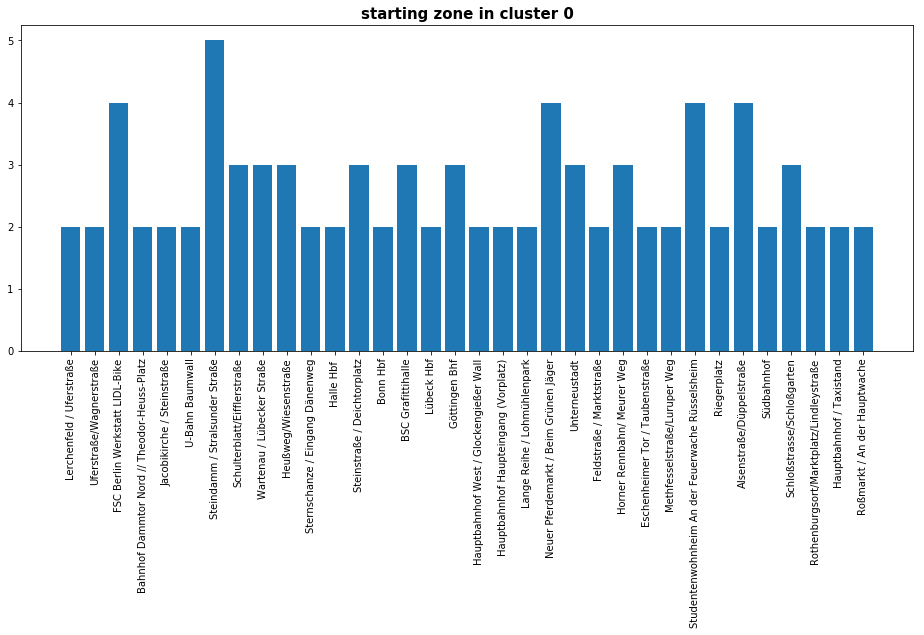

In [263]:
x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()

In [264]:
EZONE = cluster0.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster0[cluster0['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))

{'Lerchenfeld / Uferstraße': 1, 'Holsteinischer Kamp/ Wagnerstraße': 1, 'FSC Berlin Werkstatt LIDL-Bike': 4, 'Hallerstraße / Rohtenbaumchaussee': 2, 'Lortzingstraße/Friedrichsberger Straße': 1, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 1, 'Hofweg/Am Langenzug': 1, 'Herbert-Wehner-Platz/Großer Schippsee': 1, 'Alter Wall/Adolphsbrücke': 1, 'Am Kaiserkai/Großer Grasbrook': 2, 'Steinstraße / Deichtorplatz': 1, 'Berliner Tor / Berlinertordamm': 2, 'Uhlandstraße / Eingang Nord': 1, 'Gänsemarkt / Büschstraße': 2, 'Glauburgstraße / Weberstraße': 2, 'Domstraße/Willy-Brandt-Straße': 2, 'Bahnhof Altona Ost/Max-Brauer-Allee': 1, 'Halle Hbf ': 3, 'Goebenstraße/Eppendorfer Weg': 2, 'Versmannstraße/Am Hannoverschen Bahnhof': 1, 'Zentralbibliothek / Münzstraße': 3, 'Heußweg/Wiesenstraße': 2, 'Harburger Rathausstraße/Deichhausweg': 1, 'Bonn Hbf': 2, '7130 Tübinger Straße': 1, 'Grindelberg / Bezirksamt Eimsbüttel': 2, 'Harvestehuder Weg / Alte Rabenstraße': 2, 'Troplowitzstraße / Beiersdorf  / NXP'

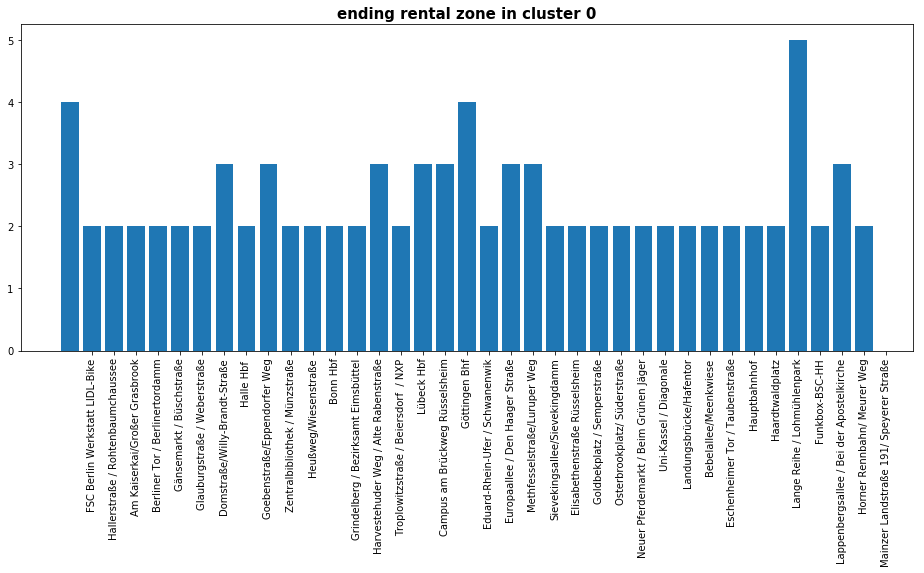

In [265]:
x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 0', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster - 1

In [266]:
cluster1 = cluster_2016[cluster_2016["labels"] == 1]
cluster1.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,1,1
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,1,1
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,1,1
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,1,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,1,1


In [267]:
cluster1.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,1.991924e+06,1.991924e+06,1.991924e+06,1991924.0
mean,1.239228e+05,1.876741e+01,3.613524e+00,1.0
std,1.906268e+04,3.513873e+01,1.412368e+00,0.0
min,1.060020e+05,1.666667e-02,1.000000e+00,1.0
25%,1.101080e+05,6.866667e+00,3.000000e+00,1.0
50%,1.174900e+05,1.150000e+01,4.000000e+00,1.0
75%,1.206020e+05,1.921667e+01,5.000000e+00,1.0
max,1.674760e+05,6.096167e+02,6.000000e+00,1.0


In [268]:
CITY = cluster1.CITY_RENTAL_ZONE.unique()
CITY

array(['Hamburg', 'Kassel', 'Darmstadt', 'Frankfurt am Main', 'Marburg',
       'Berlin', 'Stuttgart', 'Köln', 'München', 'Wiesbaden',
       'Rüsselsheim', 'Mannheim', 'Karlsruhe', 'Bonn', 'Halle', 'Lübeck',
       'Baden-Baden', 'Bamberg', 'Göttingen', 'Flugh. Frankfurt',
       'Oberhausen', 'Kiel', 'Freiburg', 'Würzburg', 'Erlangen',
       'Düsseldorf', 'Troisdorf', 'Weimar', 'Heidelberg', 'Gütersloh',
       'Fulda', 'Bremen', 'Mainz', 'Saarbrücken', 'Hannover',
       'Aschaffenburg', 'Hanau', 'Braunschweig', 'Magdeburg',
       'Kaiserslautern', 'Warnemünde', 'Oldenburg (Oldb)', 'Bielefeld',
       'Ingolstadt', 'Rostock'], dtype=object)

In [269]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster1[cluster1['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


{'Hamburg': 1073386, 'Kassel': 59432, 'Darmstadt': 78475, 'Frankfurt am Main': 307646, 'Marburg': 61172, 'Berlin': 129611, 'Stuttgart': 56025, 'Köln': 82025, 'München': 123144, 'Wiesbaden': 5512, 'Rüsselsheim': 12137, 'Mannheim': 85, 'Karlsruhe': 76, 'Bonn': 117, 'Halle': 154, 'Lübeck': 39, 'Baden-Baden': 291, 'Bamberg': 34, 'Göttingen': 106, 'Flugh. Frankfurt': 1101, 'Oberhausen': 11, 'Kiel': 345, 'Freiburg': 63, 'Würzburg': 31, 'Erlangen': 16, 'Düsseldorf': 107, 'Troisdorf': 151, 'Weimar': 20, 'Heidelberg': 84, 'Gütersloh': 5, 'Fulda': 23, 'Bremen': 109, 'Mainz': 70, 'Saarbrücken': 30, 'Hannover': 105, 'Aschaffenburg': 35, 'Hanau': 21, 'Braunschweig': 18, 'Magdeburg': 25, 'Kaiserslautern': 19, 'Warnemünde': 20, 'Oldenburg (Oldb)': 12, 'Bielefeld': 19, 'Ingolstadt': 6, 'Rostock': 11}


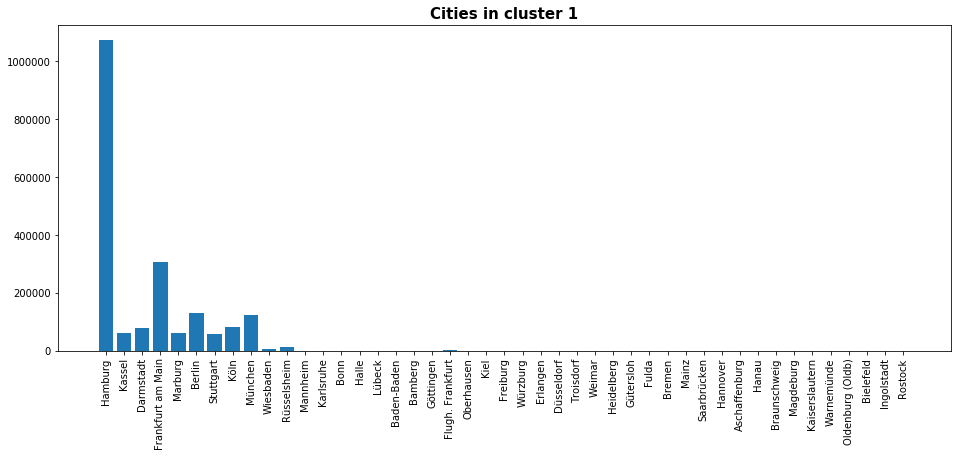

In [270]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


In [271]:
MONTH = cluster1.Month.unique()
MONTH

array([1, 2, 3, 4, 5, 6])

In [272]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster1[cluster1['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


{1: 228875, 2: 261980, 3: 309302, 4: 493623, 5: 646232, 6: 51912}


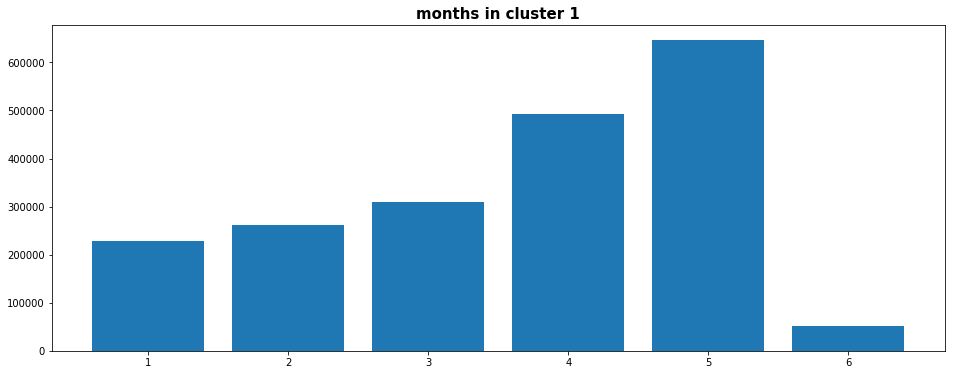

In [273]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


In [274]:
CHANNEL = cluster1.TECHNICAL_INCOME_CHANNEL.unique()
CHANNEL


array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [275]:
channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster1[cluster1['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    


{'Android': 528789, 'iPhone': 689490, 'others': 465487, 'IVR': 283401, 'Windows': 24541, 'BlackBerry': 216}


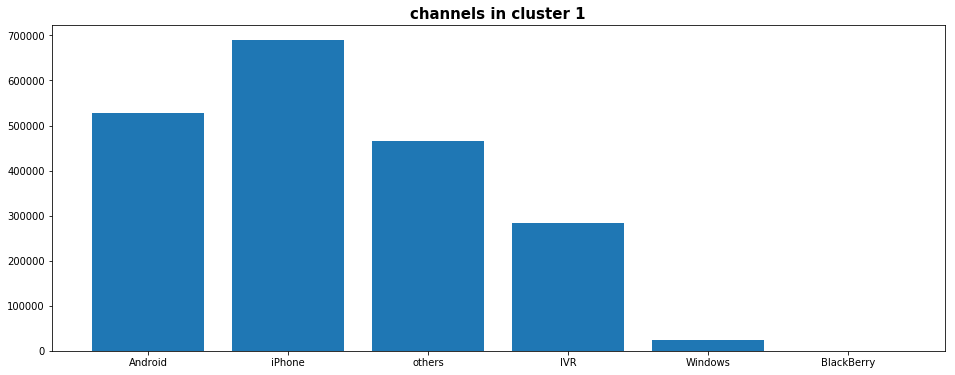

In [276]:
x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channels in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()

In [277]:
SZONE = cluster1.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster1[cluster1['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))


{'Überseering/Mexikoring': 3290, 'Stadthausbrücke / Neuer Wall': 3656, 'Jungfernstieg / Ballindamm': 17428, 'Hudtwalckerstraße / Bebelallee': 9916, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 13659, 'Hauptbahnhof / Rainer-Dierichs-Platz': 3453, 'Darmstadt Hbf': 13300, 'Darmstadtium': 3717, 'Alter Wall/Adolphsbrücke': 4544, 'Allende-Platz/Grindelhof': 23899, 'Harvestehuder Weg / Alte Rabenstraße': 12053, 'Frankenallee / Schwalbacherstraße': 2082, 'Kellinghusenstraße / Loogeplatz': 7902, 'Eduard-Rhein-Ufer / Schwanenwik': 16805, 'Elisabeth-Blochmann-Platz / Mensa': 7457, 'Bahnhof Dammtor Süd / Marseiller Straße': 9536, 'U-Bahn Baumwall': 11270, 'Mannesallee/Veringstraße': 3769, 'Saarlandstraße/Wiesendamm': 8679, 'Gutenbergstraße / Fachbereich Psychologie': 2537, 'Konstablerwache': 7192, 'Hammerbrook / Sachsenfeld': 12965, 'Friedrichsplatz': 1488, 'Waldecker Str. / Jungfernkopf': 352, 'Bernhard-Nocht-Straße/Zirkusweg': 11322, 'Langenfelder Damm/Müggenkampstraße': 4921, 'Innocentiapark/

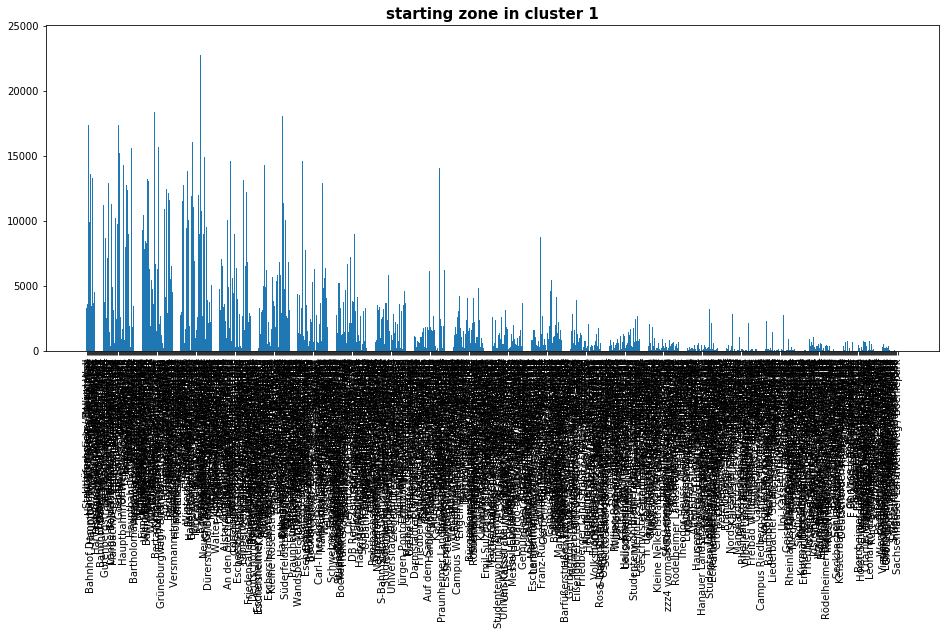

In [278]:
x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


In [279]:
EZONE = cluster1.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster1[cluster1['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))


{'Bebelallee/Meenkwiese': 7894, 'Goldbekplatz / Semperstraße': 18442, 'Hauptbahnhof Ost / Hachmannplatz': 14326, 'Kellinghusenstraße / Loogeplatz': 8021, 'Feldstraße / Marktstraße': 11353, 'Uni-Kassel / Diagonale': 6666, 'Darmstadtium': 3218, 'Sievekingsallee/Sievekingdamm': 4481, 'Harvestehuder Weg / Alte Rabenstraße': 12287, 'Adalbertstraße / Schlossstraße': 1522, 'Goebenstraße/Eppendorfer Weg': 15514, 'Leinpfad/Fernsicht': 10303, 'Ginseldorfer Weg / Försterweg': 3704, 'Osterstraße/Bismarckstraße': 14539, 'St.Petersburger Straße/Bei den Kirchhöfen': 3293, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 13545, 'Versmannstraße/Am Hannoverschen Bahnhof': 3837, 'Saarlandstraße/Wiesendamm': 8345, 'Stadtbüro': 665, 'Konstablerwache': 7606, 'Messehallen / Marktstraße': 10135, 'Haltestelle Kirchweg/Wilhelmshöher Allee': 3422, 'Mombachstraße': 3465, 'Wandsbeker Chaussee/Ritterstraße': 6634, 'Schulterblatt/Eifflerstraße': 22969, 'Bahrenfelder Straße/Völckersstraße': 11446, 'Adlerwerke Kleyerstr

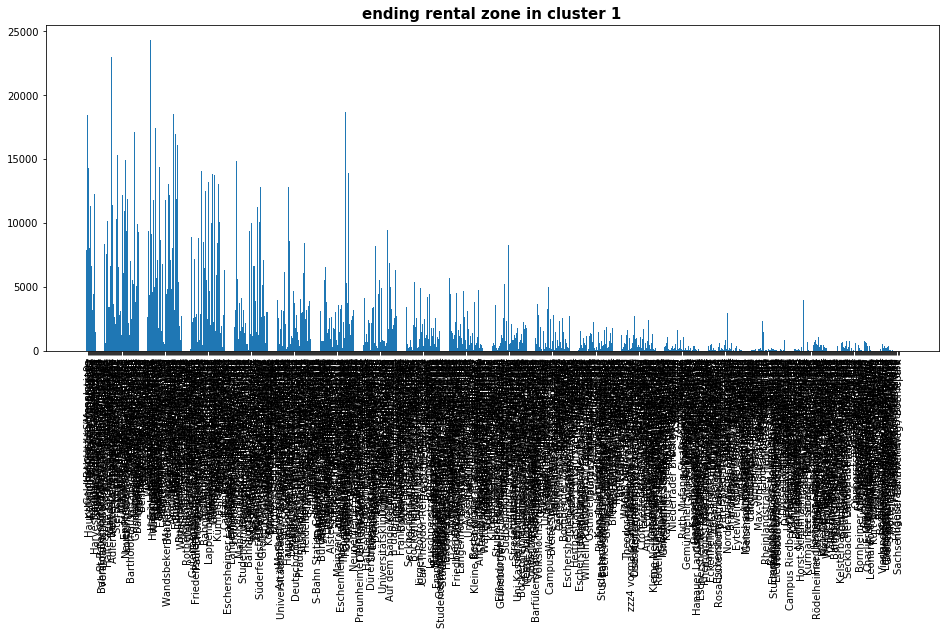

In [280]:
x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 1', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-2

In [281]:
cluster2 = cluster_2016[cluster_2016["labels"] == 2]
cluster2.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
123,115663,Hochschulstadion,Luisenplatz / Rheinstraße,Darmstadt,iPhone,665.650000,1,2
124,109428,Emil-Andresen-Straße / Lohkoppelweg,Löwenstraße/Eppendorfer Weg,Berlin,Android,693.133333,1,2
146,116433,Westbahnhof,S-Bahn Station Galluswarte / Mainzer Landstraße,Frankfurt am Main,iPhone,983.033333,1,2
249,111018,Wilhelminenplatz,Heidelberger Straße / Landskronstraße,Darmstadt,Android,844.066667,1,2
843,116712,Salzmannshausen / SMA,Staatstheater/Unterer Friedrichsplatz,Kassel,iPhone,866.100000,1,2


In [282]:
cluster2.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,6319.000000,6319.000000,6319.000000,6319.0
mean,125474.066783,1200.689848,3.726539,2.0
std,21073.246909,472.565171,1.387861,0.0
min,106014.000000,609.750000,1.000000,2.0
25%,109735.000000,797.216667,3.000000,2.0
50%,117255.000000,1150.600000,4.000000,2.0
75%,143393.000000,1428.933333,5.000000,2.0
max,167454.000000,2619.200000,6.000000,2.0


In [283]:
CITY = cluster2.CITY_RENTAL_ZONE.unique()
CITY

array(['Darmstadt', 'Berlin', 'Frankfurt am Main', 'Kassel', 'Hamburg',
       'Köln', 'Weimar', 'Wiesbaden', 'München', 'Stuttgart', 'Freiburg',
       'Marburg', 'Halle', 'Oldenburg (Oldb)', 'Saarbrücken', 'Göttingen',
       'Fulda', 'Heidelberg', 'Rüsselsheim', 'Bonn', 'Baden-Baden',
       'Würzburg', 'Hanau', 'Ingolstadt', 'Braunschweig', 'Karlsruhe',
       'Bamberg', 'Bremen', 'Aschaffenburg', 'Hannover', 'Düsseldorf',
       'Kaiserslautern', 'Lübeck', 'Bielefeld', 'Gütersloh', 'Mannheim',
       'Mainz', 'Kiel', 'Rostock', 'Erlangen', 'Magdeburg',
       'Flugh. Frankfurt'], dtype=object)

In [284]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster2[cluster2['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


{'Darmstadt': 166, 'Berlin': 1121, 'Frankfurt am Main': 1315, 'Kassel': 163, 'Hamburg': 2206, 'Köln': 346, 'Weimar': 6, 'Wiesbaden': 22, 'München': 306, 'Stuttgart': 193, 'Freiburg': 22, 'Marburg': 122, 'Halle': 66, 'Oldenburg (Oldb)': 3, 'Saarbrücken': 5, 'Göttingen': 17, 'Fulda': 5, 'Heidelberg': 12, 'Rüsselsheim': 60, 'Bonn': 33, 'Baden-Baden': 5, 'Würzburg': 8, 'Hanau': 3, 'Ingolstadt': 2, 'Braunschweig': 5, 'Karlsruhe': 10, 'Bamberg': 3, 'Bremen': 23, 'Aschaffenburg': 2, 'Hannover': 9, 'Düsseldorf': 13, 'Kaiserslautern': 3, 'Lübeck': 8, 'Bielefeld': 3, 'Gütersloh': 1, 'Mannheim': 5, 'Mainz': 4, 'Kiel': 8, 'Rostock': 1, 'Erlangen': 6, 'Magdeburg': 6, 'Flugh. Frankfurt': 2}


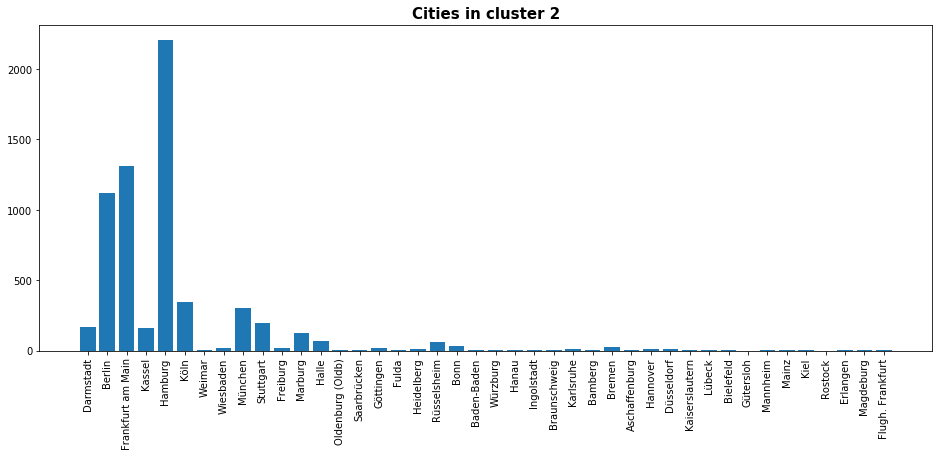

In [288]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


In [289]:
MONTH = cluster2.Month.unique()
MONTH


array([1, 2, 3, 4, 5, 6])

In [290]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster2[cluster2['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


{1: 628, 2: 727, 3: 1075, 4: 1365, 5: 2363, 6: 161}


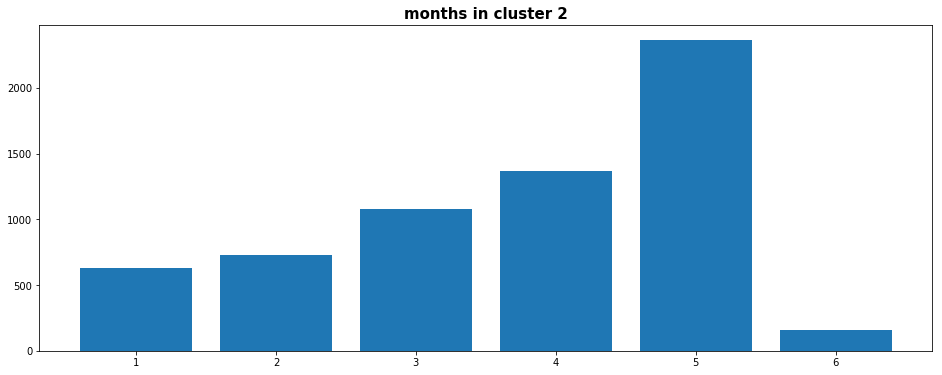

In [291]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


In [292]:
CHANNEL = cluster2.TECHNICAL_INCOME_CHANNEL.unique()
CHANNEL

array(['iPhone', 'Android', 'others', 'IVR', 'Windows'], dtype=object)

In [293]:
channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster2[cluster2['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    


{'iPhone': 2065, 'Android': 1507, 'others': 1488, 'IVR': 1210, 'Windows': 49}


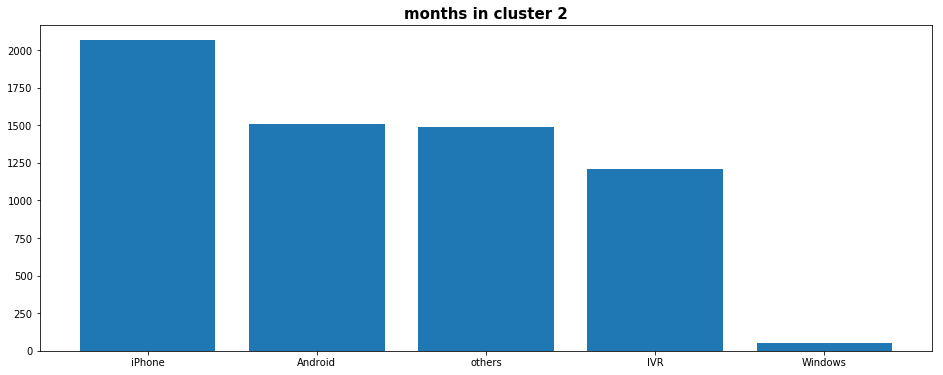

In [294]:
x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('months in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


In [295]:
SZONE = cluster2.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster2[cluster2['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))


{'Hochschulstadion': 10, 'Emil-Andresen-Straße / Lohkoppelweg': 5, 'Westbahnhof': 19, 'Wilhelminenplatz': 4, 'Salzmannshausen / SMA': 4, 'Landungsbrücke/Hafentor': 42, 'Isestraße / Hoheluftbrücke': 24, 'Leinpfad/Fernsicht': 38, 'Weimar Hbf': 6, 'Steinstraße / Deichtorplatz': 25, 'Bahnhof-Haupt- Domseite': 20, 'Industriehof': 4, 'Paulinenplatz/Wohlwillstraße': 33, 'Königstraße / Struenseestraße': 11, 'Studentenwohnheim Ginnheimer Landstr. 42': 9, 'Berger Straße / Falltorstraße': 8, 'Kellinghusenstraße / Loogeplatz': 13, 'Hauptbahnhof Ost / Hachmannplatz': 57, 'Ginseldorfer Weg / Försterweg': 12, 'Dormero-Hotel / Europaallee': 7, 'Gänsemarkt / Büschstraße': 17, 'Saalburgallee / Kettelerallee': 2, 'Holsteinischer Kamp/ Wagnerstraße': 13, 'Caffamacherreihe/Valentinskamp.': 14, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 39, 'Großneumarkt/Thielbek': 14, 'Eduard-Rhein-Ufer / Schwanenwik': 45, 'Winterhuder Weg/ Zimmerstraße': 26, 'Bahnhof Haupt- Breslauer Platz': 2, 'Wiesendamm/Roggenkamp'

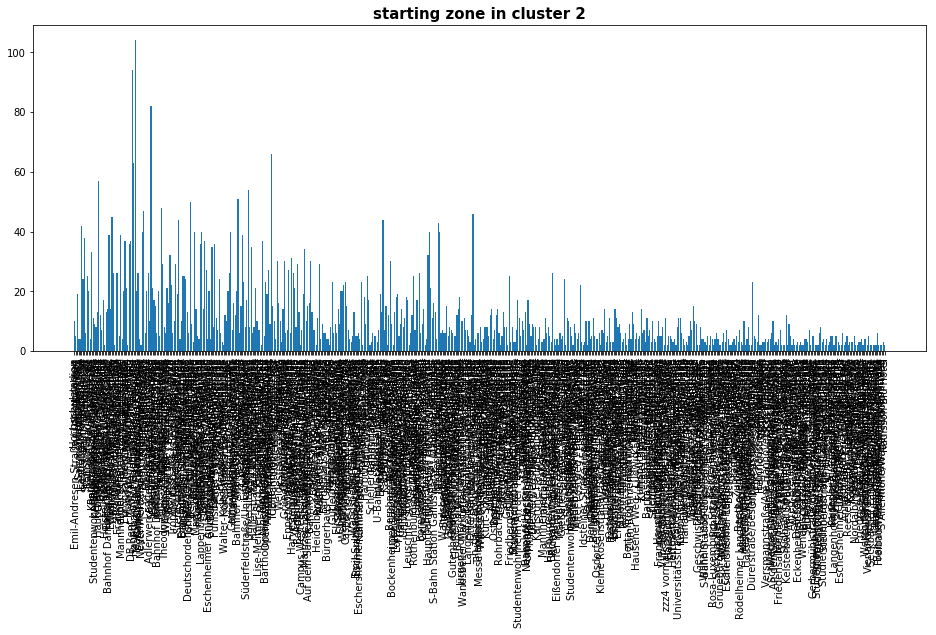

In [296]:
x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


In [297]:
EZONE = cluster2.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster2[cluster2['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))


{'Luisenplatz / Rheinstraße': 18, 'Löwenstraße/Eppendorfer Weg': 16, 'S-Bahn Station Galluswarte / Mainzer Landstraße': 9, 'Heidelberger Straße / Landskronstraße': 16, 'Staatstheater/Unterer Friedrichsplatz': 19, 'Wilhelmsburger Platz/Zur Schleuse': 20, 'Eppendorfer Weg/Hoheluftchaussee': 40, 'Leinpfad/Fernsicht': 21, 'Weimar Hbf': 6, 'Mönckebergstraße / Rosenstraße': 23, 'Langenfelder Damm/Müggenkampstraße': 12, 'Adlerwerke Kleyerstrasse / Kriegkstrasse': 13, 'Hauptbahnhof': 31, 'Hauptbahnhof Ost / Hachmannplatz': 60, 'Konstablerwache': 31, 'Arnsburger Straße / Mainkurstraße': 31, 'Speyerer Straße / Koblenzer Straße': 4, 'Uhlandstraße / Eingang Nord': 21, 'Sievekingsallee/Sievekingdamm': 9, 'Jungfernstieg / Ballindamm': 46, 'Feldstraße / Marktstraße': 29, 'Holsteinischer Kamp/ Wagnerstraße': 19, 'Millerntorplatz/St.Pauli': 34, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 39, 'Eduard-Rhein-Ufer / Schwanenwik': 48, 'Hallerstraße / Rohtenbaumchaussee': 17, 'Mundsburg / Schürbeker Straß

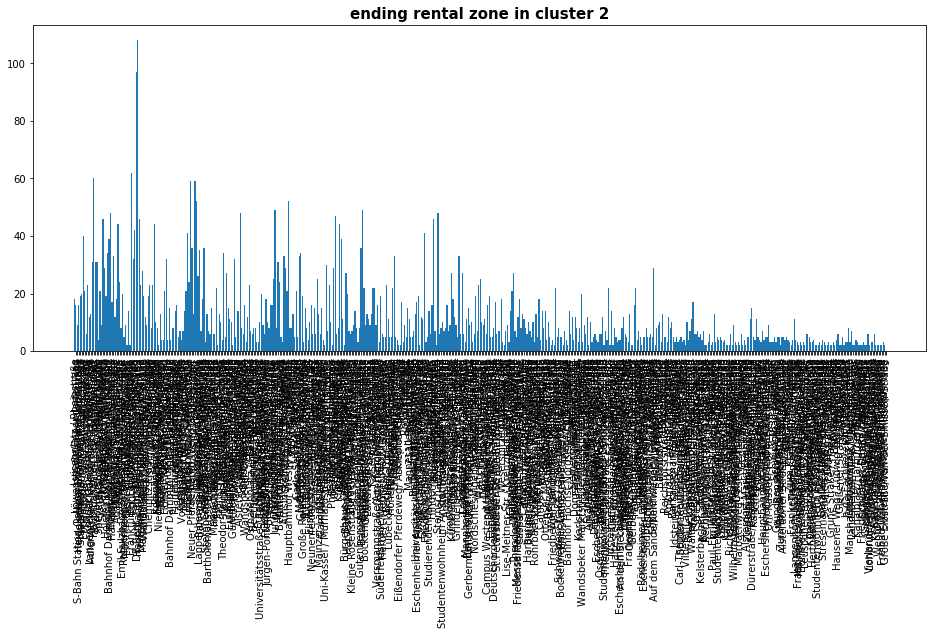

In [298]:
x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 2', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-3

In [299]:
cluster3 = cluster_2016[cluster_2016["labels"] == 3]
cluster3.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
138077,110994,Bahrenfelder Straße/Völckersstraße,Bahrenfelder Straße/Völckersstraße,Köln,iPhone,41923.966667,1,3
152679,116625,Osterstraße/Bismarckstraße,Goebenstraße/Eppendorfer Weg,Berlin,others,33605.800000,1,3
246961,109479,Heidelberger Straße 49,h_da / Campus - Mensa,Berlin,iPhone,54373.350000,2,3
292500,108521,Campus Riedberg Mensa,Hauptbahnhof,Berlin,others,47356.650000,2,3
320763,108073,Theodor-Heuss-Allee / Varrentrappstraße,Woolworth Leipziger Strasse,Berlin,Android,42916.266667,2,3


In [300]:
cluster3.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,38.000000,38.000000,38.000000,38.0
mean,130720.157895,41248.318421,3.921053,3.0
std,24525.939830,10014.826120,1.343283,0.0
min,106779.000000,27687.416667,1.000000,3.0
25%,109725.500000,32430.025000,3.000000,3.0
50%,118331.500000,41916.425000,4.500000,3.0
75%,163722.000000,47552.575000,5.000000,3.0
max,165820.000000,64241.100000,6.000000,3.0


In [301]:
CITY = cluster3.CITY_RENTAL_ZONE.unique()
CITY

array(['Köln', 'Berlin', 'Frankfurt am Main', 'Braunschweig', 'Bamberg',
       'Darmstadt', 'Gütersloh', 'Würzburg', 'Bremen', 'Halle',
       'Warnemünde', 'Hamburg'], dtype=object)

In [302]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster3[cluster3['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  

{'Köln': 1, 'Berlin': 12, 'Frankfurt am Main': 12, 'Braunschweig': 1, 'Bamberg': 1, 'Darmstadt': 2, 'Gütersloh': 1, 'Würzburg': 1, 'Bremen': 2, 'Halle': 1, 'Warnemünde': 1, 'Hamburg': 3}


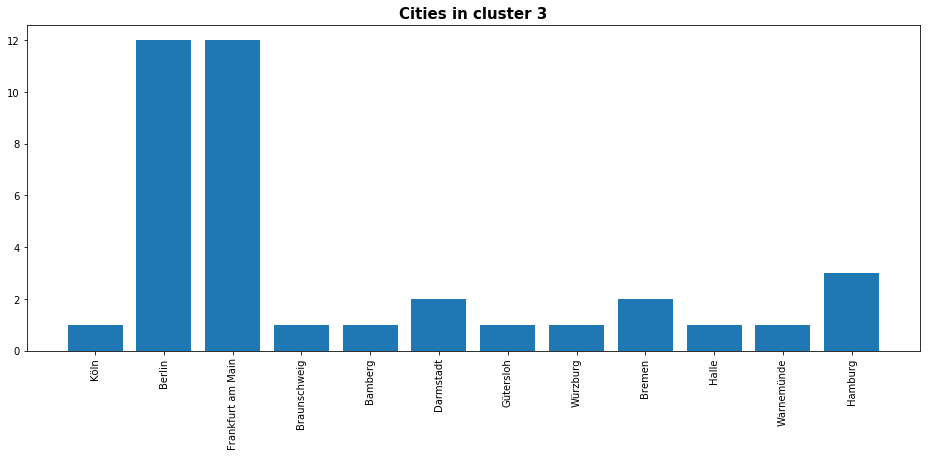

In [303]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


In [304]:
MONTH = cluster3.Month.unique()
MONTH

array([1, 2, 3, 4, 5, 6])

In [305]:
month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster3[cluster3['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


{1: 2, 2: 5, 3: 7, 4: 5, 5: 18, 6: 1}


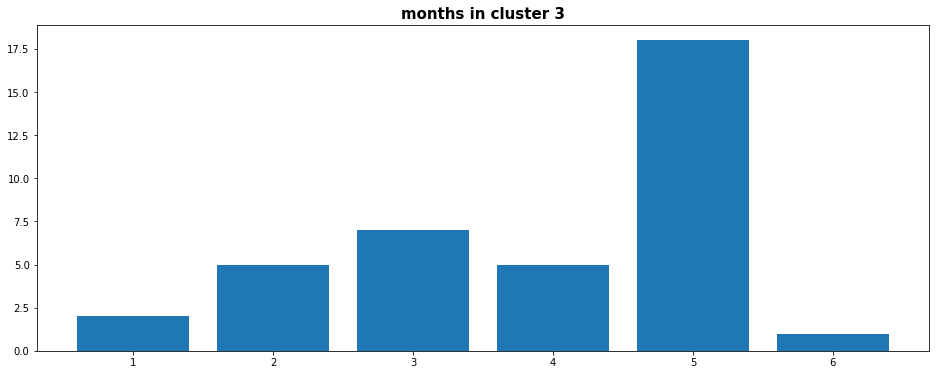

In [306]:
x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()

['iPhone' 'others' 'Android' 'IVR']
{'iPhone': 14, 'others': 5, 'Android': 16, 'IVR': 3}


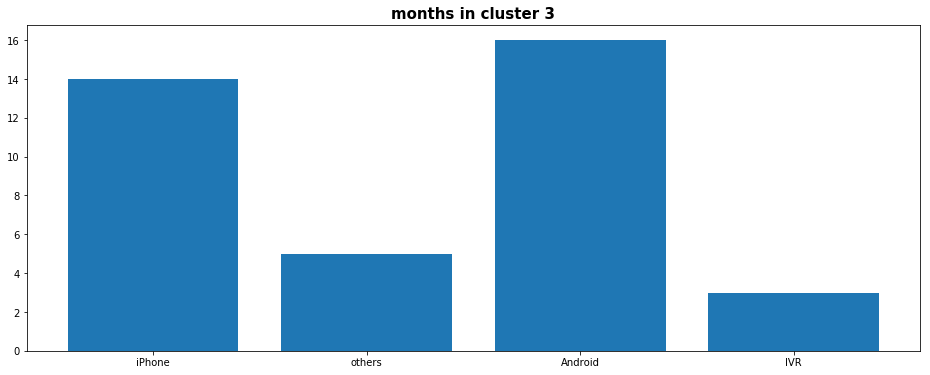

In [307]:
CHANNEL = cluster3.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster3[cluster3['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('months in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Bahrenfelder Straße/Völckersstraße': 1, 'Osterstraße/Bismarckstraße': 1, 'Heidelberger Straße 49': 1, 'Campus Riedberg Mensa': 1, 'Theodor-Heuss-Allee / Varrentrappstraße': 1, 'Römerberg': 1, 'Landungsbrücke/Hafentor': 1, 'BSC Grafittihalle': 2, 'An den Siechengärten / Alter Kirchhainer Weg': 1, 'Braunschweig Hbf': 1, 'Reeperbahn / Königstraße': 1, 'Bamberg Bf': 1, 'Hörsaalgebäude / Biegenstraße': 1, 'Gänsemarkt / Büschstraße': 1, 'Hochschulstadion': 1, 'Süderfeldstraße/Universitätsklinikum Eppendorf': 1, 'Gütersloh Hbf': 1, 'Hochschulstraße': 1, 'Saarlandstraße/Wiesendamm': 2, 'Würzburg Hbf': 1, 'Universitätsklinikum / Theodor-Stern-Kai': 1, 'Allende-Platz/Grindelhof': 1, 'Bremen Hbf': 2, 'Bernhard-Nocht-Straße/Zirkusweg': 1, 'Halle Universitätsring': 1, 'Warnemünde Bf': 1, 'S-Bahn Station Galluswarte / Mainzer Landstraße': 1, 'FSC Berlin Werkstatt LIDL-Bike': 1, 'Jürgen-Ponto-Platz / Neckarstraße (DB-Tower)': 1, 'Zentralbibliothek / Münzstraße': 1, 'h_da / Campus - Mensa': 1, 'Eiff

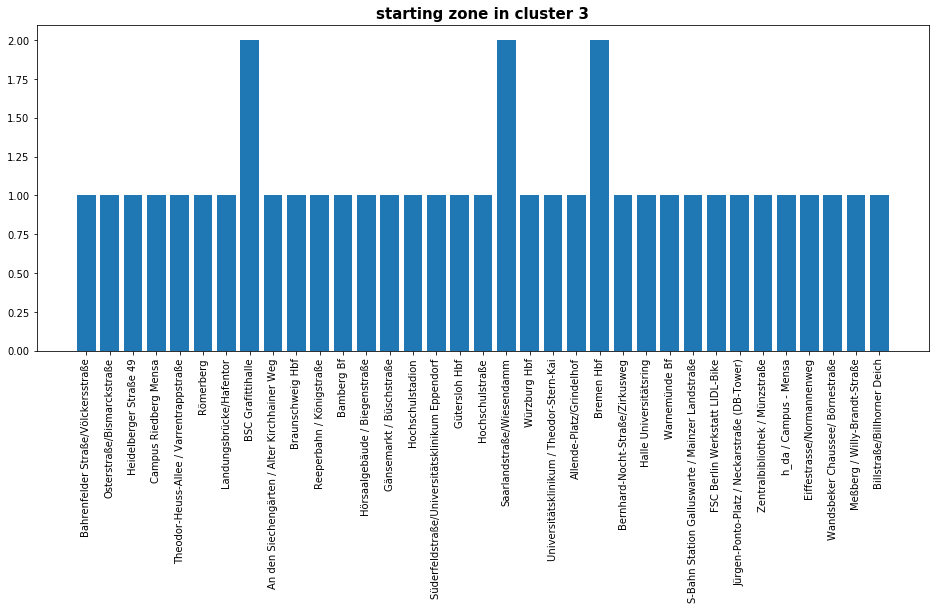

In [308]:
SZONE = cluster3.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster3[cluster3['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

'''
for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))
'''

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Bahrenfelder Straße/Völckersstraße': 1, 'Goebenstraße/Eppendorfer Weg': 1, 'h_da / Campus - Mensa': 1, 'Hauptbahnhof': 1, 'Woolworth Leipziger Strasse': 1, 'Uferstraße/Wagnerstraße': 1, 'Neumühlen/Övelgönne': 1, 'Bürgerhaus Wehrda / Huteweg': 1, 'Ortenbergplatz': 1, 'BSC Grafittihalle': 1, 'Braunschweig Hbf': 1, 'Große Bergstraße / Jessenstraße': 1, 'Bamberg Bf': 1, 'Gutenbergstraße / Fachbereich Psychologie': 1, 'h_da KITA / Bibliothek': 1, 'Landwehrstraße / Kasinostraße': 1, 'Kümmellstraße / Robert-Koch-Straße': 1, 'Gütersloh Hbf': 1, 'Frankfurter Landstraße / Ettesterstraße': 1, 'Jarrestraße / Rambatzweg': 1, 'Gänsemarkt / Büschstraße': 2, 'Goethestraße / Opernplatz': 1, 'Wilhelmsburger Platz/Zur Schleuse': 1, 'Bernhard-Nocht-Straße/Zirkusweg': 1, 'Friedrich-Ebert-Damm / Lomerstraße': 1, 'Schulterblatt/Eifflerstraße': 1, 'Halle Rudolf-Breitscheid-Straße': 1, 'Warnemünde Bf': 1, 'Idsteiner Straße / Eppenhainer Straße': 1, 'Südring/Stadthallenbrücke': 1, 'FSC Berlin Werkstatt LIDL-B

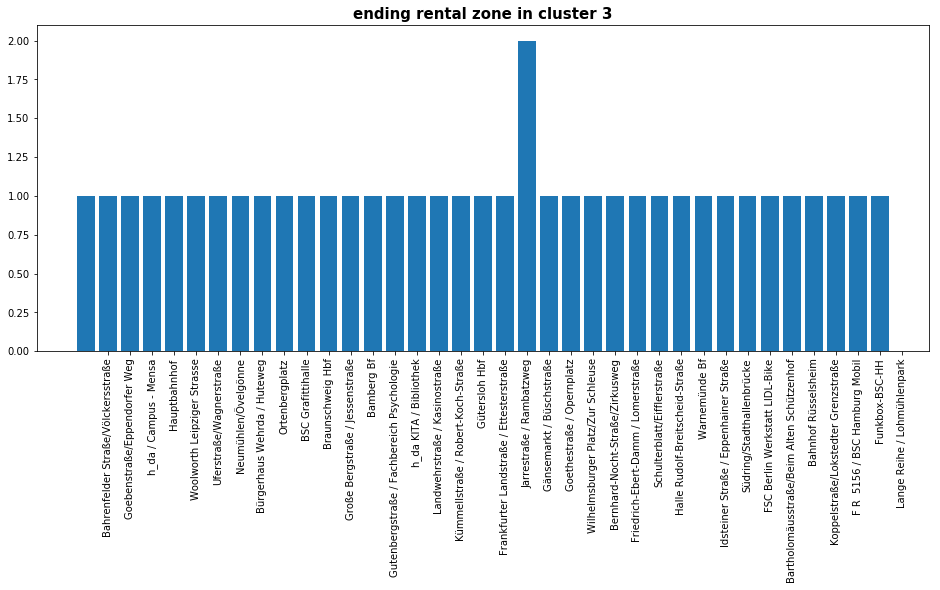

In [309]:
EZONE = cluster3.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster3[cluster3['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

'''
for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))
'''


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 3', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-4

In [310]:
cluster4 = cluster_2016[cluster_2016["labels"] == 4]
cluster4.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
83115,116999,Halle Rudolf-Breitscheid-Straße,Halle Universitätsring,Halle,IVR,80985.800000,1,4
116390,164574,BSC Grafittihalle,BSC Grafittihalle,Frankfurt am Main,Android,103358.566667,1,4
122699,164333,BSC Repeater,Kanalplatz/Harburger Schlossstraße,Frankfurt am Main,Android,149659.966667,1,4
406841,110994,Marbachweg / Eschersheimer Landstraße,Gravensteiner Platz,Köln,iPhone,88788.100000,2,4
448812,116062,Funkbox-BSC-HH,Funkbox-BSC-HH,Hamburg,iPhone,90870.250000,2,4


In [311]:
cluster4.describe()


,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,8.00000,8.000000,8.000000,8.0
mean,133456.75000,93151.510417,2.000000,4.0
std,25755.19776,25777.413640,1.069045,0.0
min,110994.00000,67704.133333,1.000000,4.0
25%,114795.00000,78251.720833,1.000000,4.0
50%,118253.50000,89829.175000,2.000000,4.0
75%,164225.75000,96186.479167,2.250000,4.0
max,164574.00000,149659.966667,4.000000,4.0


['Halle' 'Frankfurt am Main' 'Köln' 'Hamburg' 'Erlangen']
{'Halle': 1, 'Frankfurt am Main': 3, 'Köln': 2, 'Hamburg': 1, 'Erlangen': 1}


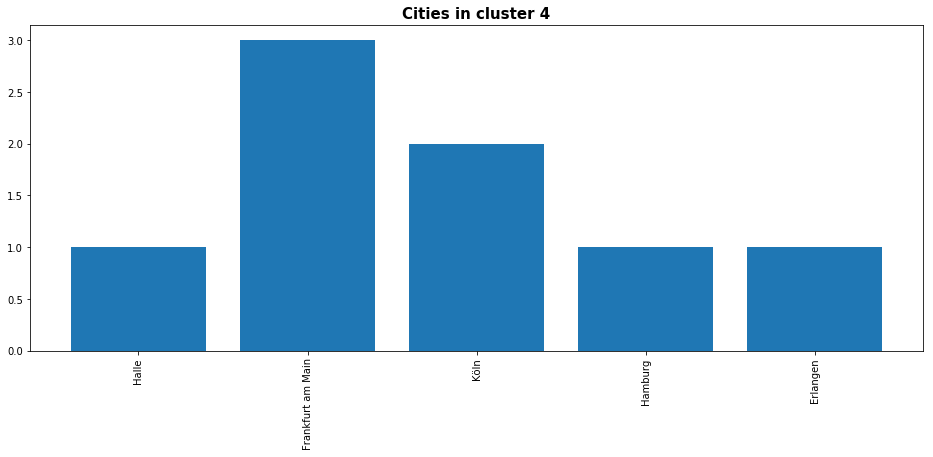

In [312]:
CITY = cluster4.CITY_RENTAL_ZONE.unique()
print(CITY)

city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster4[cluster4['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


[1 2 3 4]
{1: 3, 2: 3, 3: 1, 4: 1}


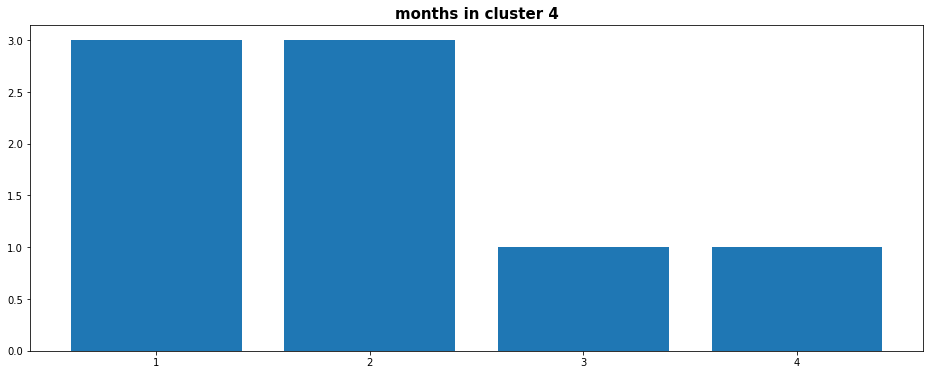

In [313]:

MONTH = cluster4.Month.unique()
print(MONTH)

month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster4[cluster4['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


['IVR' 'Android' 'iPhone']
{'IVR': 3, 'Android': 2, 'iPhone': 3}


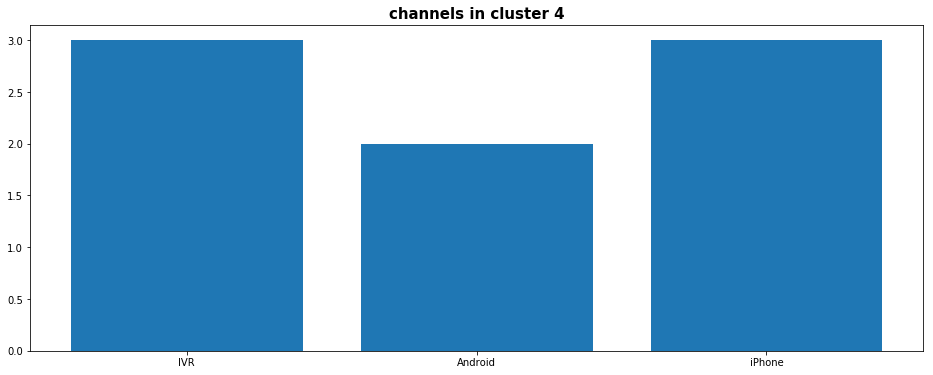

In [314]:
CHANNEL = cluster4.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster4[cluster4['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channels in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Halle Rudolf-Breitscheid-Straße': 1, 'BSC Grafittihalle': 1, 'BSC Repeater': 1, 'Marbachweg / Eschersheimer Landstraße': 1, 'Funkbox-BSC-HH': 1, 'Lange Reihe / Lohmühlenpark': 1, 'Erlangen Hbf': 1, 'Museum Ludwig': 1}
8
8


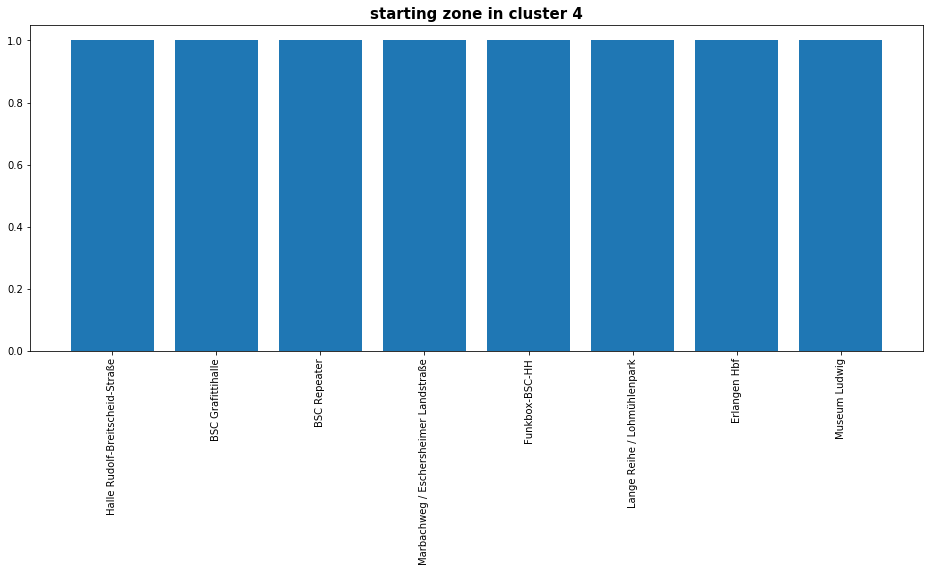

In [315]:
SZONE = cluster4.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster4[cluster4['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

'''
for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))
'''

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Halle Universitätsring': 1, 'BSC Grafittihalle': 1, 'Kanalplatz/Harburger Schlossstraße': 1, 'Gravensteiner Platz': 1, 'Funkbox-BSC-HH': 1, 'Mönckebergstraße / Steintorwall': 1, 'Erlangen Hbf': 1, 'Fressgass': 1}
8


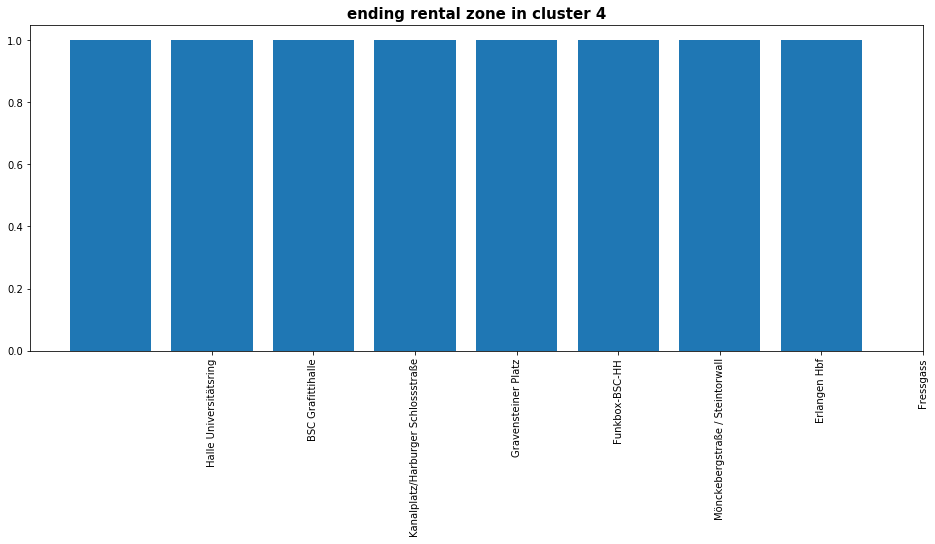

In [316]:
EZONE = cluster4.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster4[cluster4['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

'''
for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))
'''


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 4', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-5

In [317]:
cluster5 = cluster_2016[cluster_2016["labels"] == 5]
cluster5.head()


,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
451,106992,Wilhelmsstr. / Ständepl.,Uni-Kassel / Diagonale,Kassel,IVR,3368.766667,1,5
585,108755,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Holsteinischer Kamp/ Wagnerstraße,Hamburg,others,4942.766667,1,5
1092,110370,Universität / Moorweidenstraße,Bebelallee/Meenkwiese,Köln,IVR,2666.966667,1,5
1645,117542,Lange Reihe / Lohmühlenpark,Jungfernstieg / Neuer Jungfernstieg,Hamburg,others,7412.566667,1,5
2425,109922,Auf dem Sande/Kehrwieder-MiniaturWunderland,Auf dem Sande/Kehrwieder-MiniaturWunderland,Berlin,iPhone,4478.750000,1,5


In [318]:
cluster5.describe()


,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,1522.000000,1522.000000,1522.000000,1522.0
mean,124937.285808,4042.515681,3.694481,5.0
std,20516.416645,1511.085250,1.436111,0.0
min,106002.000000,2622.516667,1.000000,5.0
25%,109948.500000,2811.745833,3.000000,5.0
50%,117099.500000,3624.425000,4.000000,5.0
75%,120802.250000,4637.933333,5.000000,5.0
max,167446.000000,8979.150000,6.000000,5.0


In [319]:
CITY = cluster5.CITY_RENTAL_ZONE.unique()
print(CITY)


['Kassel' 'Hamburg' 'Köln' 'Berlin' 'Darmstadt' 'Frankfurt am Main'
 'Halle' 'Rüsselsheim' 'Marburg' 'Göttingen' 'Fulda' 'Warnemünde'
 'Stuttgart' 'Saarbrücken' 'Mainz' 'München' 'Karlsruhe' 'Rostock'
 'Baden-Baden' 'Wiesbaden' 'Troisdorf' 'Heidelberg' 'Düsseldorf' 'Bamberg'
 'Bremen' 'Mannheim' 'Hannover' 'Würzburg' 'Magdeburg' 'Erlangen' 'Bonn'
 'Hanau' 'Freiburg']


{'Kassel': 39, 'Hamburg': 391, 'Köln': 71, 'Berlin': 258, 'Darmstadt': 82, 'Frankfurt am Main': 306, 'Halle': 69, 'Rüsselsheim': 60, 'Marburg': 55, 'Göttingen': 7, 'Fulda': 2, 'Warnemünde': 2, 'Stuttgart': 45, 'Saarbrücken': 4, 'Mainz': 2, 'München': 78, 'Karlsruhe': 2, 'Rostock': 1, 'Baden-Baden': 2, 'Wiesbaden': 8, 'Troisdorf': 2, 'Heidelberg': 9, 'Düsseldorf': 2, 'Bamberg': 1, 'Bremen': 6, 'Mannheim': 2, 'Hannover': 5, 'Würzburg': 2, 'Magdeburg': 2, 'Erlangen': 2, 'Bonn': 1, 'Hanau': 1, 'Freiburg': 3}


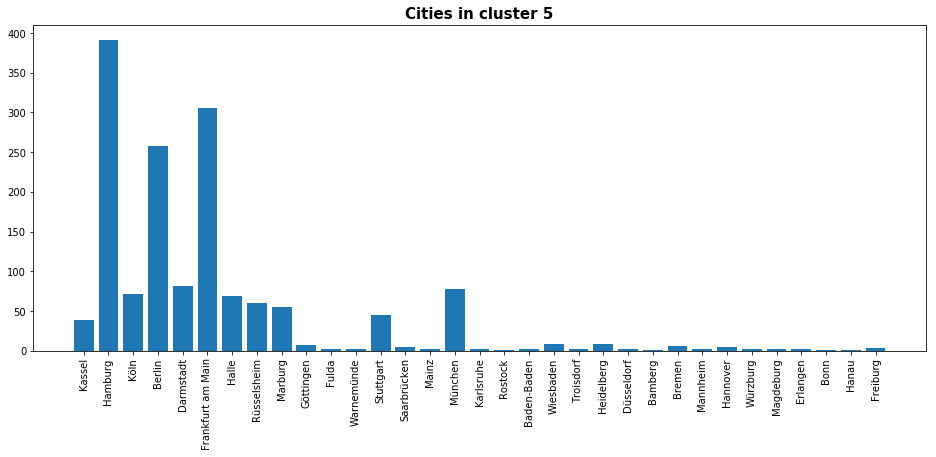

In [320]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster5[cluster5['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


[1 2 3 4 5 6]
{1: 184, 2: 167, 3: 226, 4: 339, 5: 565, 6: 41}


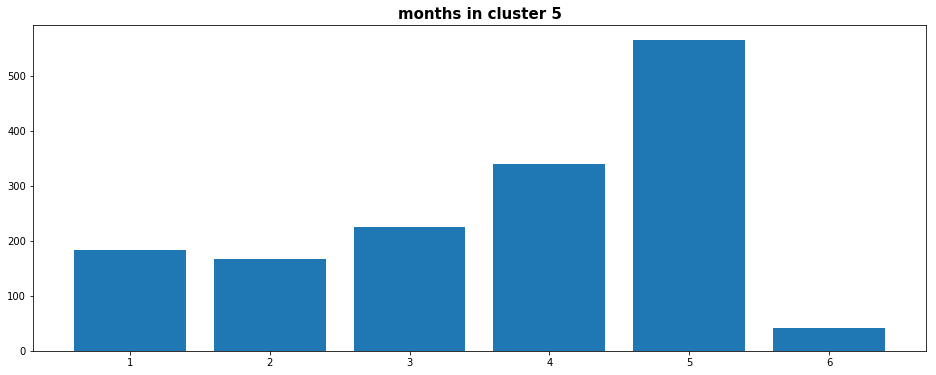

In [321]:
MONTH = cluster5.Month.unique()
print(MONTH)

month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster5[cluster5['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


['IVR' 'others' 'iPhone' 'Android' 'Windows']
{'IVR': 267, 'others': 276, 'iPhone': 503, 'Android': 459, 'Windows': 17}


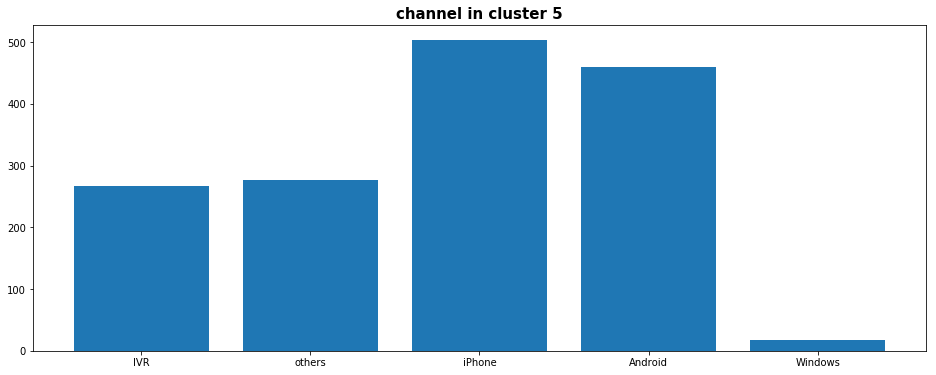

In [322]:
CHANNEL = cluster5.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster5[cluster5['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channel in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Wilhelmsstr. / Ständepl.': 1, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 7, 'Universität / Moorweidenstraße': 4, 'Lange Reihe / Lohmühlenpark': 10, 'Auf dem Sande/Kehrwieder-MiniaturWunderland': 5, 'Bartholomäusstraße/Beim Alten Schützenhof': 5, 'Heußweg/Wiesenstraße': 4, 'Mittelweg/Sophienterrasse-NDR': 1, 'Großneumarkt/Thielbek': 4, 'Darmstadt Hbf': 17, 'Carl-Theodor-Reiffenstein-Platz / Hasengasse': 2, 'Lübecker Straße / Marienkrankenhaus': 1, 'Michaeliskirche / Krayenkamp': 2, 'Burgstraße/Hammer Landstraße': 8, 'Halle Rudolf-Breitscheid-Straße': 25, 'Wartenau / Lübecker Straße': 6, 'Alter Wall/Adolphsbrücke': 3, 'Bogenstraße / Grindelallee': 4, 'Hochschulstraße': 11, 'Halle Hbf ': 28, 'Löwenstraße/Eppendorfer Weg': 4, 'Hörsaalgebäude / Biegenstraße': 3, 'Hofweg/Am Langenzug': 9, 'Caffamacherreihe/Valentinskamp.': 4, 'Wandsbeker Chaussee/ Börnestraße': 1, 'Theodor-Heuss-Allee / Varrentrappstraße': 1, 'Sternschanze / Eingang Dänenweg': 13, 'Hauptbahnhof': 11, 'Universitätsklini

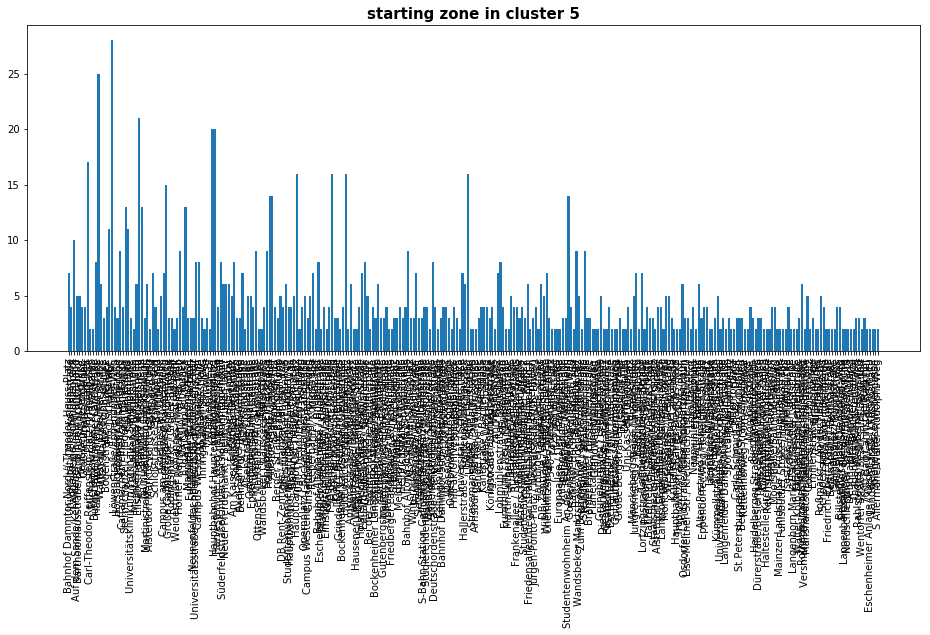

In [323]:
SZONE = cluster5.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster5[cluster5['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))


for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Uni-Kassel / Diagonale': 6, 'Holsteinischer Kamp/ Wagnerstraße': 7, 'Bebelallee/Meenkwiese': 8, 'Jungfernstieg / Neuer Jungfernstieg': 11, 'Auf dem Sande/Kehrwieder-MiniaturWunderland': 6, 'Dehnhaide/Barmbeker Markt': 2, 'Bei der Hammer Kirche/Hammerpark': 9, 'Osakaallee/Übersee Quartier': 10, 'Riegerplatz': 4, 'Kantstraße / Berger Straße': 3, 'Habichtstraße/Steilshooper Straße': 1, 'Stadthausbrücke / Neuer Wall': 4, 'Hasselbrookstraße/Papenstraße': 7, 'Halle Universitätsring': 19, 'Hauptbahnhof West / Glockengießer Wall': 14, 'Steindamm / Stralsunder Straße': 7, 'Schulterblatt/Eifflerstraße': 11, 'Halle Hbf ': 29, 'Elisabethenstraße Rüsselsheim': 14, 'Harvestehuder Weg / Alte Rabenstraße': 10, 'Hauptbahnhof': 15, 'Hammerbrook / Sachsenfeld': 3, 'Landungsbrücke/Hafentor': 15, 'DB_MobilityCenter': 1, 'Europaallee / Den Haager Straße': 6, 'Sternschanze / Eingang Dänenweg': 11, 'Bettinaplatz / Bettinastraße': 3, '7308 Johannesstraße': 1, 'Osterstraße/Bismarckstraße': 9, 'Universität / M

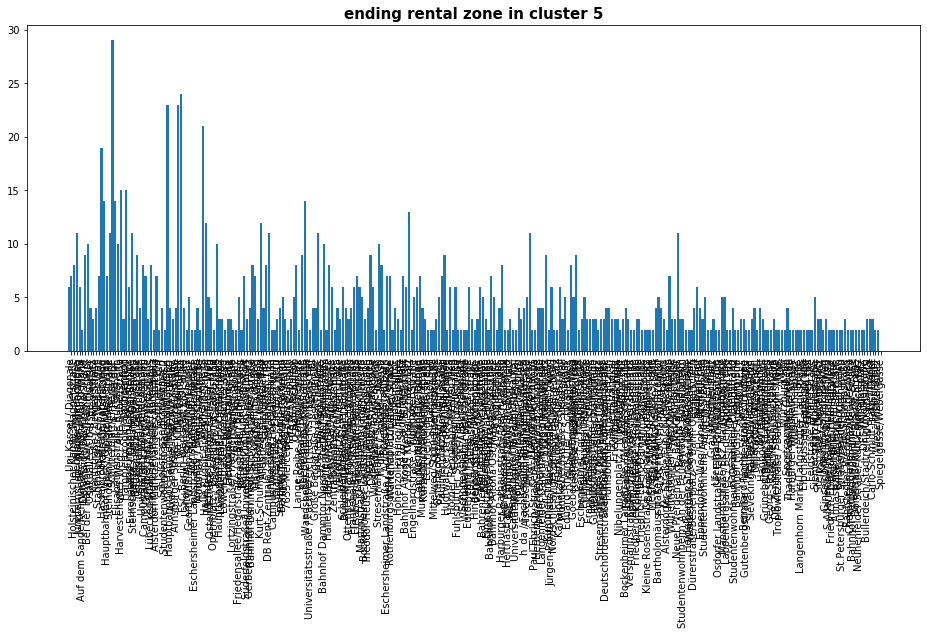

In [324]:
EZONE = cluster5.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster5[cluster5['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))


for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 5', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

### Analysis on cluster-6

In [325]:
cluster6 = cluster_2016[cluster_2016["labels"] == 6]
cluster6.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month,labels
490159,167442,Zentralbibliothek / Münzstraße,Amsinckstraße/ Nordkanalbrücke,Frankfurt am Main,Android,645180.0,2,6
490160,167443,Zentralbibliothek / Münzstraße,Amsinckstraße/ Nordkanalbrücke,Frankfurt am Main,Android,645180.0,2,6
771683,143417,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Sternschanze / Eingang Dänenweg,Frankfurt am Main,iPhone,594720.0,3,6


In [326]:
cluster6.describe()

,VEHICLE_HAL_ID,Ride_Duration_new,Month,labels
count,3.000000,3.000000,3.000000,3.0
mean,159434.000000,628360.000000,2.333333,6.0
std,13871.128901,29133.094583,0.577350,0.0
min,143417.000000,594720.000000,2.000000,6.0
25%,155429.500000,619950.000000,2.000000,6.0
50%,167442.000000,645180.000000,2.000000,6.0
75%,167442.500000,645180.000000,2.500000,6.0
max,167443.000000,645180.000000,3.000000,6.0


['Frankfurt am Main']
{'Frankfurt am Main': 3}


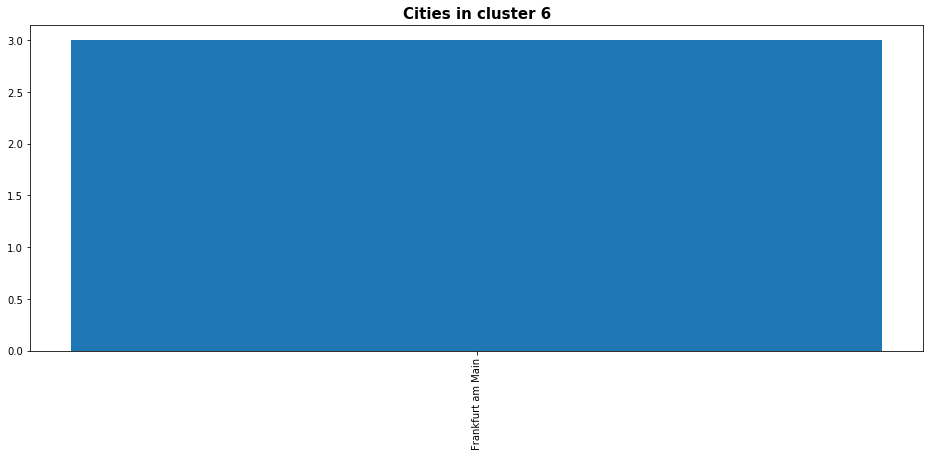

In [327]:

CITY = cluster6.CITY_RENTAL_ZONE.unique()
print(CITY)

city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(cluster6[cluster6['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])
print(city_dict)  


x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()


[2 3]
{2: 2, 3: 1}


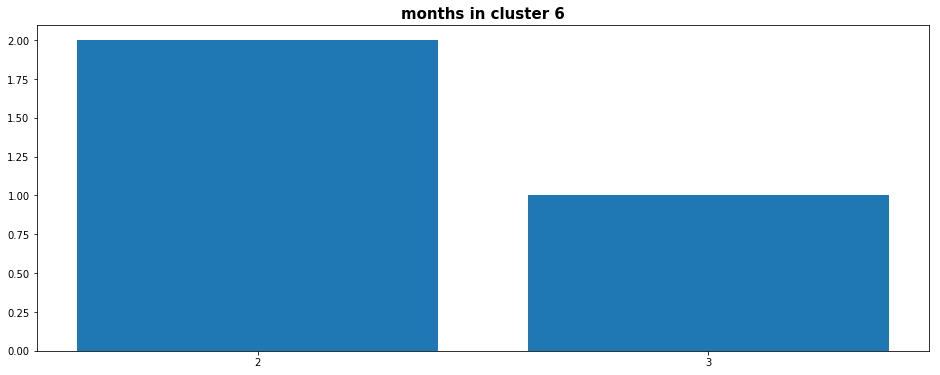

In [328]:
MONTH = cluster6.Month.unique()
print(MONTH)

month_dict = {}
months, month_count = [],[]
for month in MONTH:
    month_dict[month] = len(cluster6[cluster6['Month']==month])
    months.append(month)
    month_count.append(month_dict[month])
print(month_dict)  


x_plot = np.arange(len(months))
plt.figure(figsize=(16,6))
plt.title('months in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_count)
plt.xticks(x_plot+1, months, rotation = 'horizontal')
plt.show()


['Android' 'iPhone']
{'Android': 2, 'iPhone': 1}


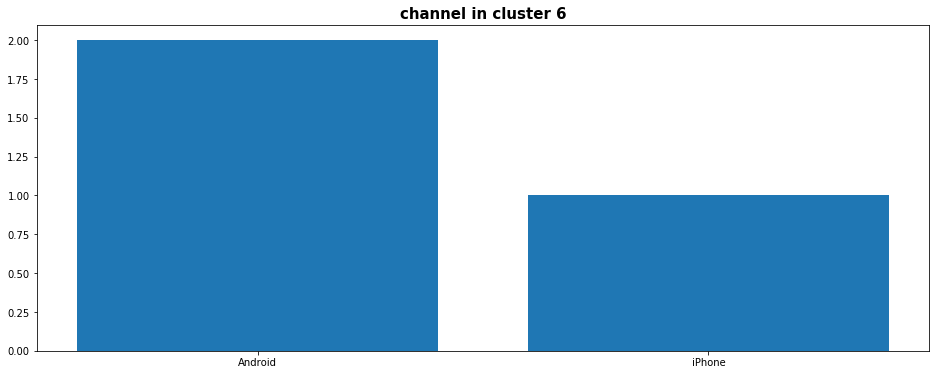

In [329]:
CHANNEL = cluster6.TECHNICAL_INCOME_CHANNEL.unique()
print(CHANNEL)

channel_dict = {}
channels, channel_count = [],[]
for channel in CHANNEL:
    channel_dict[channel] = len(cluster6[cluster6['TECHNICAL_INCOME_CHANNEL']==channel])
    channels.append(channel)
    channel_count.append(channel_dict[channel])
print(channel_dict)    

x_plot = np.arange(len(channels))
plt.figure(figsize=(16,6))
plt.title('channel in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, channel_count)
plt.xticks(x_plot+1, channels, rotation = 'horizontal')
plt.show()


{'Zentralbibliothek / Münzstraße': 2, 'Bahnhof Dammtor Nord // Theodor-Heuss-Platz': 1}
2
2


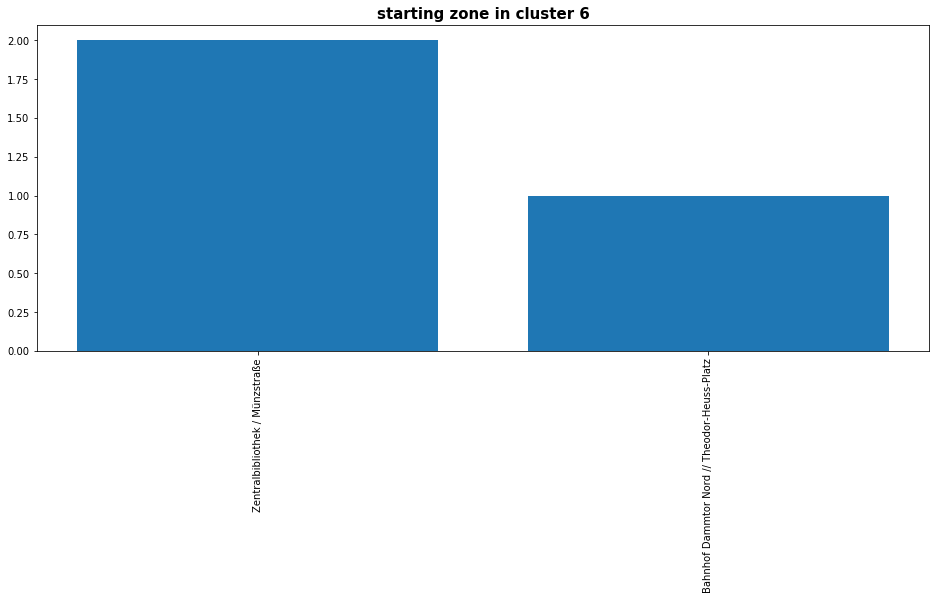

In [330]:
SZONE = cluster6.START_RENTAL_ZONE.unique()
szone_dict = {}
szones, szone_count = [],[]
for szone in SZONE:
    szone_dict[szone] = len(cluster6[cluster6['START_RENTAL_ZONE']==szone])
    szones.append(szone)
    szone_count.append(szone_dict[szone])
print(szone_dict)

print(len(szone_dict))
print(len(szones))

'''
for key in list(szone_dict.keys()):  ## creates a list of all keys
    if szone_dict[key] == 1:
        szones.remove(key)
        szone_count.remove(1)
        del szone_dict[key]
print(len(szones))
'''

x_plot = np.arange(len(szones))
plt.figure(figsize=(16,6))
plt.title('starting zone in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, szone_count)
plt.xticks(x_plot+1, szones, rotation = 'vertical')
plt.show()


{'Amsinckstraße/ Nordkanalbrücke': 2, 'Sternschanze / Eingang Dänenweg': 1}
2


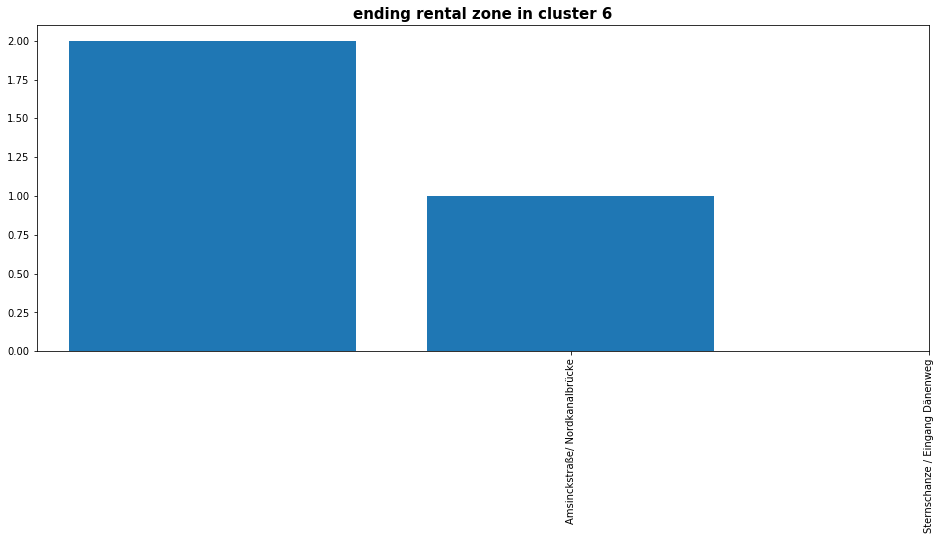

In [331]:
EZONE = cluster6.END_RENTAL_ZONE.unique()
ezone_dict = {}
ezones, ezone_count = [],[]
for ezone in EZONE:
    ezone_dict[ezone] = len(cluster6[cluster6['END_RENTAL_ZONE']==ezone])
    ezones.append(ezone)
    ezone_count.append(ezone_dict[ezone])
print((ezone_dict))
print(len(ezones))

'''
for key in list(ezone_dict.keys()):  ## creates a list of all keys
    if ezone_dict[key] == 1:
        ezones.remove(key)
        ezone_count.remove(1)
        del ezone_dict[key]
print(len(ezones))
'''


x_plot = np.arange(len(ezones))
plt.figure(figsize=(16,6))
plt.title('ending rental zone in cluster 6', fontsize=15, fontweight='bold')
p = plt.bar(x_plot, ezone_count)
plt.xticks(x_plot+1, ezones, rotation = 'vertical')
plt.show()

* As must of the dataset goes in cluster-1 which is quite big in size
* So again we divide the cluster-1 into 7 small clusters.
* This is called Hierarchical clustering

In [37]:
# As we already used categorical features and they are already encoded. So we use kmeans algorithm for clustering.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)  
pr_out = kmeans.fit(plot_columns)
#plot_columns

In [38]:
pr_out = kmeans.transform(plot_columns)

In [39]:
colors = ['red','green','purple','blue','cyan','black','pink','brown','yellow']

In [40]:
kmeans.labels_

array([0, 4, 4, ..., 3, 2, 3], dtype=int32)

In [41]:
len(plot_columns)

2000000

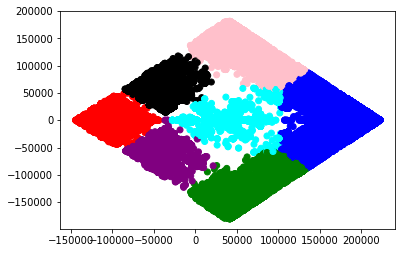

In [42]:
# plotting the sub-clusters 

plt.scatter(plot_columns[:,0],plot_columns[:,1],c=[colors[l] for l in kmeans.labels_])
#plt.show()

In [43]:
plt.savefig('hierarchial_clustering.png')

<Figure size 432x288 with 0 Axes>

* Here we see that the dataset are easily separable by the cluster labels.